In [15]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from functions import continuous_feature_to_category
from functions import calculate_gain_ratio
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder

In [2]:
data = pd.read_csv("Laptop_price.csv")

In [3]:
data.head()

,Brand,Processor_Speed,RAM_Size,Storage_Capacity,Screen_Size,Weight,Price
0,Asus,3.830296,16,512,11.185147,2.641094,17395.093065
1,Acer,2.912833,4,1000,11.311372,3.260012,31607.605919
2,Lenovo,3.241627,4,256,11.853023,2.029061,9291.023542
3,Acer,3.806248,16,512,12.280360,4.573865,17436.728334
4,Acer,3.268097,32,1000,14.990877,4.193472,32917.990718


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Brand             1000 non-null   object 
 1   Processor_Speed   1000 non-null   float64
 2   RAM_Size          1000 non-null   int64  
 3   Storage_Capacity  1000 non-null   int64  
 4   Screen_Size       1000 non-null   float64
 5   Weight            1000 non-null   float64
 6   Price             1000 non-null   float64
dtypes: float64(4), int64(2), object(1)
memory usage: 54.8+ KB


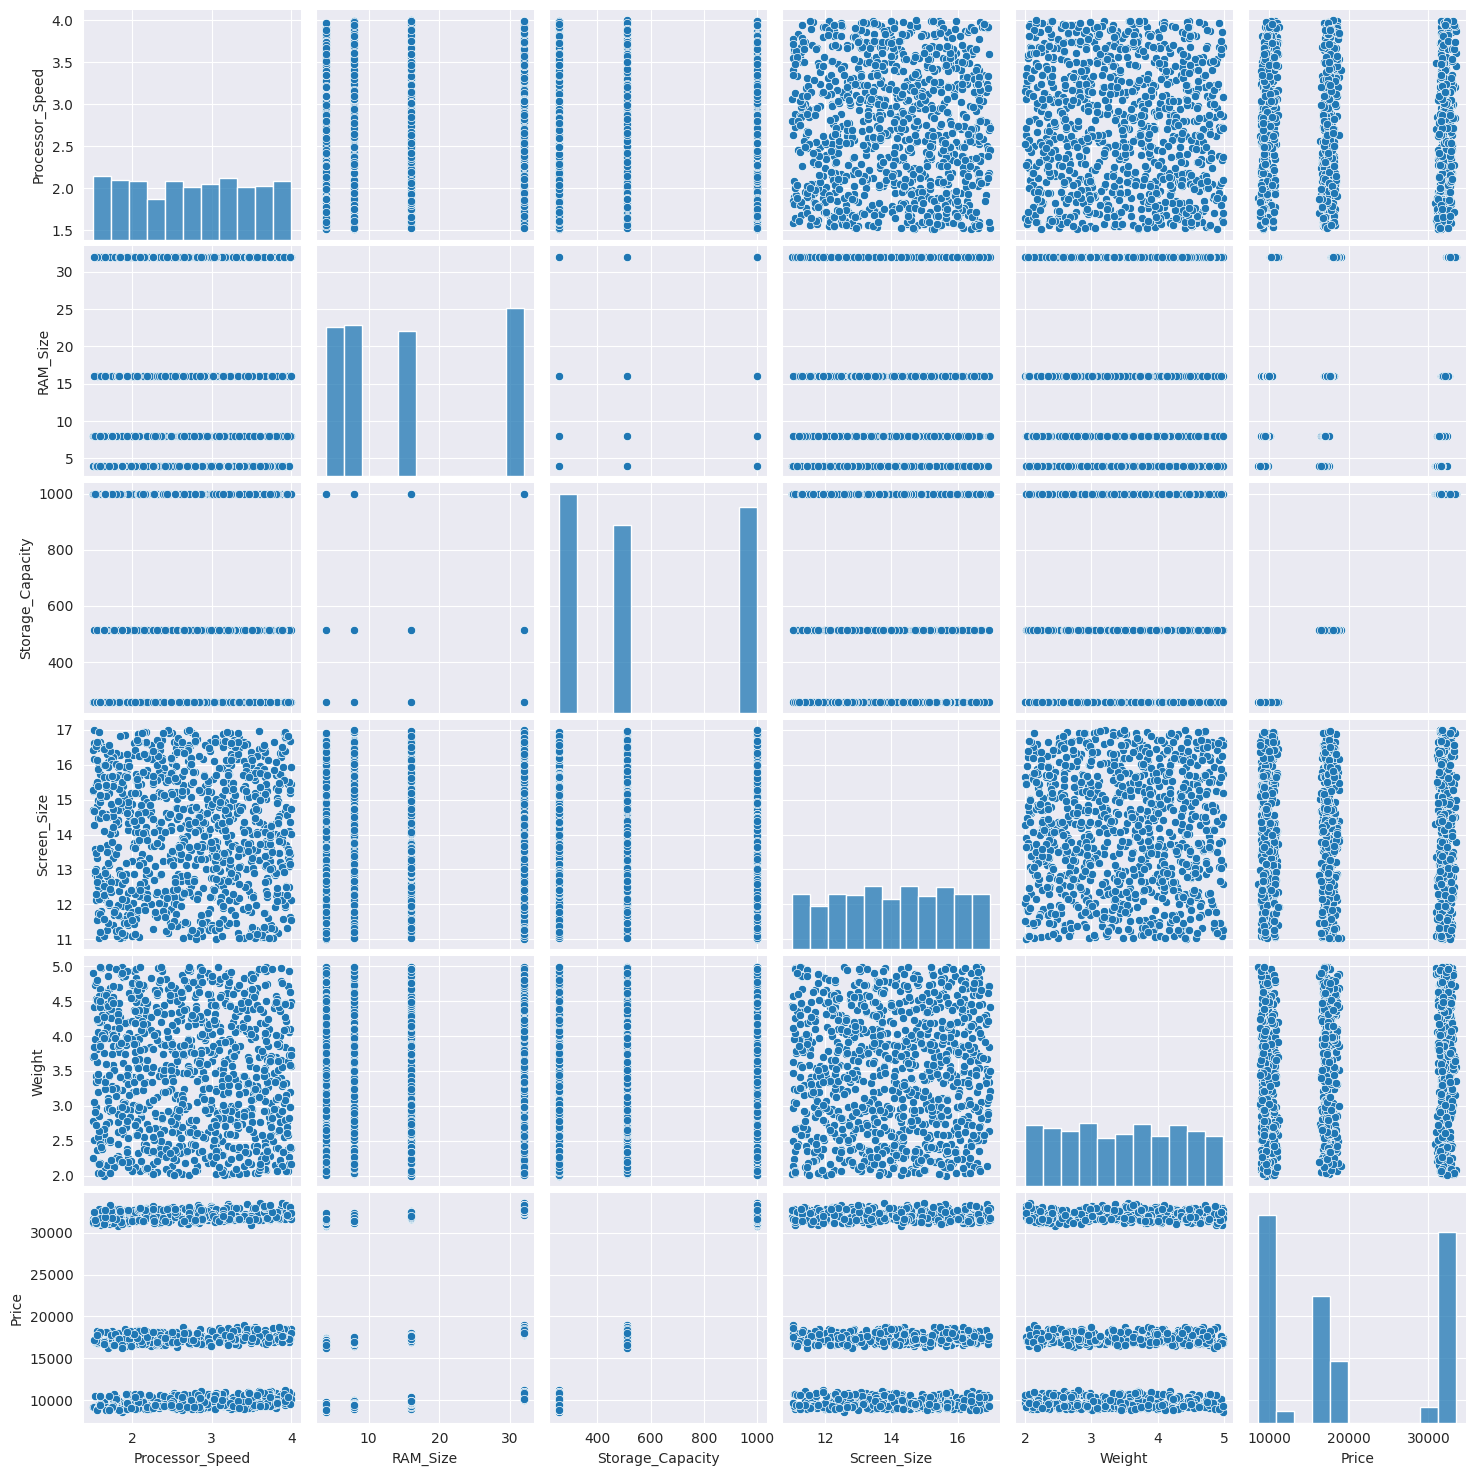

In [5]:
sns.pairplot(data)

In [5]:
corr_table = data.drop(columns=["Brand", ]).corr()
corr_table

,Processor_Speed,RAM_Size,Storage_Capacity,Screen_Size,Weight,Price
Processor_Speed,1.000000,0.021391,-0.067576,-0.013425,-0.054603,-0.050737
RAM_Size,0.021391,1.000000,0.002111,-0.036002,-0.025382,0.061237
Storage_Capacity,-0.067576,0.002111,1.000000,-0.027560,0.041335,0.997908
Screen_Size,-0.013425,-0.036002,-0.027560,1.000000,0.021995,-0.026740
Weight,-0.054603,-0.025382,0.041335,0.021995,1.000000,0.038417
Price,-0.050737,0.061237,0.997908,-0.026740,0.038417,1.000000


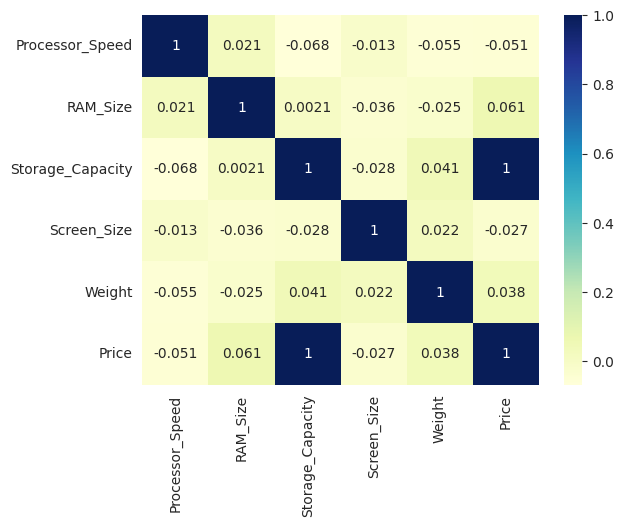

In [6]:
dataplot = sns.heatmap(corr_table, cmap="YlGnBu", annot=True)

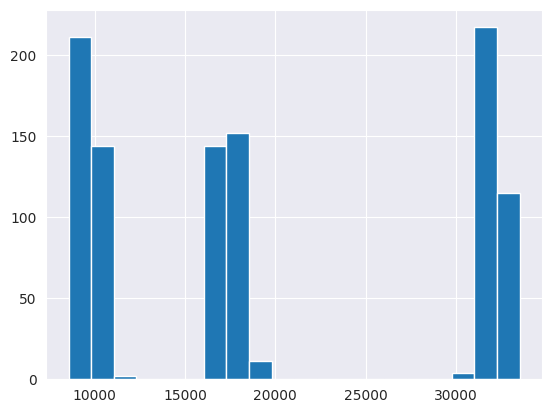

In [7]:
(n, bins, patches) = plt.hist(data["Price"], bins=20, label='hst', )


In [19]:

categorical_features = [x for x in data.columns[:-1] if data[x].dtype == 'object']
numeric_features = [x for x in data.columns[:-1] if data[x].dtype != 'object']

column_to_descr = numeric_features + ["Price"]
column_to_descr.remove("RAM_Size")
column_to_descr.remove("Storage_Capacity")

data_categor = continuous_feature_to_category(data, column_to_descr)

data_categor.head()

,Brand,Processor_Speed,RAM_Size,Storage_Capacity,Screen_Size,Weight,Price
0,Asus,"(3.75, 3.999]",16,512,"(11.006, 11.609]","(2.599, 2.898]","(16050.19, 18543.582]"
1,Acer,"(2.755, 3.004]",4,1000,"(11.006, 11.609]","(3.197, 3.496]","(31010.543, 33503.935]"
2,Lenovo,"(3.004, 3.252]",4,256,"(11.609, 12.207]","(1.998, 2.3]","(8545.079, 11063.405]"
3,Acer,"(3.75, 3.999]",16,512,"(12.207, 12.804]","(4.393, 4.692]","(16050.19, 18543.582]"
4,Acer,"(3.252, 3.501]",32,1000,"(14.596, 15.194]","(4.094, 4.393]","(31010.543, 33503.935]"


In [6]:
gain_ratios = pd.Series(index=data_categor.columns[:-1])
for column in gain_ratios.keys():
    gain_ratios[column] = calculate_gain_ratio(data_categor[column], data_categor["Price"])

gain_ratios


Brand               0.007553
Processor_Speed     0.011679
RAM_Size            0.019459
Storage_Capacity    1.000000
Screen_Size         0.009884
Weight              0.008869
dtype: float64

In [7]:
# 
# 
regressor = RandomForestRegressor(n_estimators=20)

X = data.copy()[data.columns[:-1]]
y = data.copy()["Price"]
one_hot_encoder = OneHotEncoder()
first_part = one_hot_encoder.fit_transform(X[categorical_features])
X_train = pd.DataFrame(first_part.toarray(), columns=one_hot_encoder.get_feature_names_out())
X_train[numeric_features] = X[numeric_features]




In [9]:
rf = RandomForestRegressor(n_estimators=20)

rf.fit(X_train, y)

feature_imp = pd.Series(rf.feature_importances_, index=X_train.columns)

<Axes: >

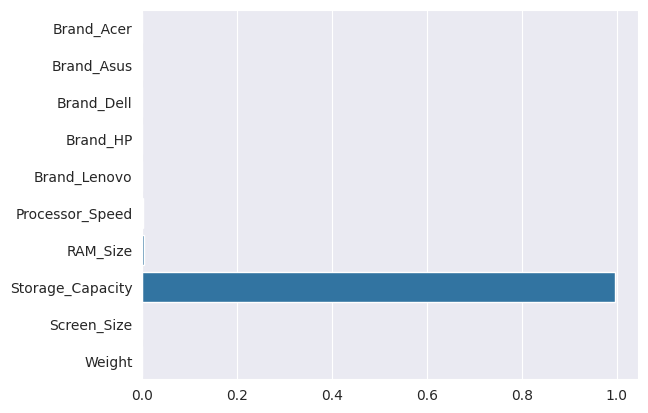

In [10]:
sns.barplot(pd.Series(feature_imp, index=X_train.columns), orient='h')

In [28]:
X_log = np.log2(data["Storage_Capacity"])
y = data["Price"]


In [29]:
np.corrcoef(X_log, y)

array([[1.        , 0.98156399],
       [0.98156399, 1.        ]])

In [30]:
np.corrcoef(X["Storage_Capacity"], y)

array([[1.        , 0.99790785],
       [0.99790785, 1.        ]])

In [31]:
X_processed = data["Storage_Capacity"]
